In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Rucode6.5/data/train.csv .
!cp /content/drive/MyDrive/Rucode6.5/data/public_test.csv .
!cp /content/drive/MyDrive/Rucode6.5/data/sample_submission.csv .

In [ ]:
!pip install catboost -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.6/98.6 MB 2.1 MB/s eta 0:00:00


In [ ]:
import string

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import torch
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
train_data = pd.read_csv('train.csv')
train_data.head()

context  \
0  **–í—ã:** –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ)).\n–ö–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞...   
1  **–í—ã:** –Ø —Ç–æ–∂–µ –Ω–µ –∑–∞–º—É–∂–µ–º. –ò—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞. ...   
2  **–í—ã:** –ò–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**...   
3  **–í—ã:** –û—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å –∏—Ö.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**...   
4  **–í—ã:** –í —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** ...   

                                              answer   label  
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...      ai  
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...  people  
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.      ai  
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.      ai  
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.      ai

# EDA

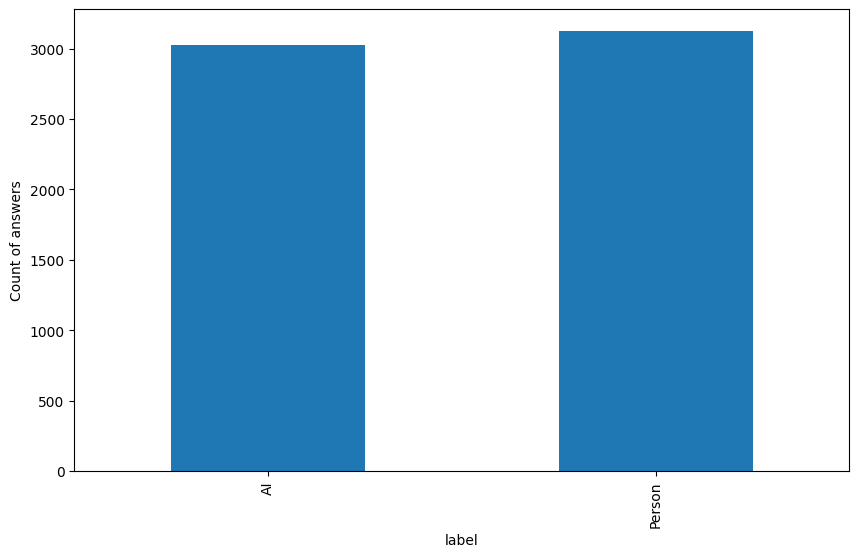

In [ ]:
plt.figure(figsize=(10,6))

train_data.groupby(['label'])['label'].count().plot.bar().set_xticklabels(['AI', 'Person'])
plt.ylabel('Count of answers')

plt.show()

–ü—Ä–æ–≤–µ—Ä–∏–ª–∏ –≥–∏–ø–æ—Ç–µ–∑—É, —á—Ç–æ –æ—Ç–≤–µ—Ç –æ—Ç –ò–ò –º–æ–∂–µ—Ç –æ—Ç–ª–∏—á–∞—Ç—å—Å—è —Ç–æ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–≥–æ –¥–ª–∏–Ω–æ–π —Ç–µ–∫—Å—Ç–∞. –ù–æ —ç—Ç–æ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–µ —Ç–∞–∫.

In [ ]:
train_data['answer_length'] = train_data.apply(lambda x: len(x[1]), axis=1)


In [ ]:
train_data.groupby(['label'])['answer_length'].describe()

count       mean        std  min   25%   50%   75%    max
label                                                             
ai      3028.0  59.315720  40.229200  1.0  32.0  53.0  74.0  570.0
people  3123.0  43.215818  28.260823  1.0  23.0  37.0  58.0  480.0

In [ ]:
train_data['label'] = train_data['label'].apply(lambda x: 1 if str(x) == 'people' else 0) # people = 1

In [ ]:
train_data.head()

context  \
0  **–í—ã:** –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ)).\n–ö–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞...   
1  **–í—ã:** –Ø —Ç–æ–∂–µ –Ω–µ –∑–∞–º—É–∂–µ–º. –ò—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞. ...   
2  **–í—ã:** –ò–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**...   
3  **–í—ã:** –û—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å –∏—Ö.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**...   
4  **–í—ã:** –í —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** ...   

                                              answer  label  answer_length  
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...      0            331  
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...      1             80  
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.      0             25  
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.      0             44  
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.      0             44

In [ ]:
n = 1
train_data.iloc[n]['context'], train_data.iloc[n]['answer'], train_data.iloc[n]['label']

('**–í—ã:** –Ø —Ç–æ–∂–µ –Ω–µ –∑–∞–º—É–∂–µ–º. –ò—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞. –ê –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –º–µ–Ω—è –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω—ã–π –ø—ë—Å–∏–∫.\r\n–ê —É –≤–∞—Å –µ—Å—Ç—å –ø–∏—Ç–æ–º—Ü—ã?\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** –£ –º–µ–Ω—è –¥–æ–º–∞ –∂–∏–≤—É—Ç —Ç–æ–ª—å–∫–æ —Ä—ã–±–∫–∏ –≤ –∞–∫–≤–∞—Ä–∏—É–º–µ, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–µ—Å—É—â–µ—Å—Ç–≤–∞, –∫–æ—Ç–æ—Ä—ã—Ö —è –ª—é–±–ª—é.\n\n**–í—ã:** –†—ã–±–∫–∏ —Ç–∏—Ö–∏–µ –∏ –Ω–µ –ø—Ä–∏—á–∏–Ω—è—Ç –¥–∏—Å–∫–æ–º—Ñ–æ—Ä—Ç. –ú–æ–π –ø—ë—Å–∏–∫ –ø–æ–≥—Ä—ã–∑–≤—Å–µ —Ñ–∏–∞–ª–∫–∏, –∞ –∏—Ö —Ç–∞–∫ –¥–æ–ª–≥–æ –≤—ã—Ä–∞—â–∏–≤–∞–ª–∞.',
 '–ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç –∏ –ø–æ–¥—Ä–∞—Ç—å—Å—è –∏ —Å–ª–æ–ø–∞—Ç—å –¥—Ä—É–≥ –¥—Ä—É–≥–∞.',
 1)

# text cleaning

In [ ]:
stopwords.words('russian')[:10]

['–∏', '–≤', '–≤–æ', '–Ω–µ', '—á—Ç–æ', '–æ–Ω', '–Ω–∞', '—è', '—Å', '—Å–æ']

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def clean_text(text):
    table = text.maketrans(dict.fromkeys(string.punctuation)) # {Punc: None}

    words = word_tokenize(text.lower().strip().translate(table)) # change Punc to None -> token

    words = [word for word in words if word not in stopwords.words('russian')]

    lemmed = [WordNetLemmatizer().lemmatize(word) for word in words]
    return " ".join(lemmed)

In [ ]:
# train_data['text'] = train_data['context'] + train_data['answer']

In [ ]:
train_data['context'] = train_data['context'].apply(clean_text)
train_data.head()

context  \
0  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∫–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞–µ—à—å —Å–æ–±–µ—Å–µ–¥–Ω...   
1  –∑–∞–º—É–∂–µ–º –∏—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –∑–∞–º–µ—á–∞—Ç...   
2  –∏–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ø–æ–Ω—è–ª –º–æ—Å–∫–≤–µ –ª—é–±...   
3  –æ—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏ –∫–∞—Ä–∏...   
4  —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è —Ñ–æ—Ç–≥—Ä–∞—Ñ...   

                                              answer  label  answer_length  
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...      0            331  
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...      1             80  
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.      0             25  
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.      0             44  
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.      0             44

In [ ]:
train_data.head()

context  \
0  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∫–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞–µ—à—å —Å–æ–±–µ—Å–µ–¥–Ω...   
1  –∑–∞–º—É–∂–µ–º –∏—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –∑–∞–º–µ—á–∞—Ç...   
2  –∏–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ø–æ–Ω—è–ª –º–æ—Å–∫–≤–µ –ª—é–±...   
3  –æ—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏ –∫–∞—Ä–∏...   
4  —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è —Ñ–æ—Ç–≥—Ä–∞—Ñ...   

                                              answer  label  answer_length  
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...      0            331  
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...      1             80  
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.      0             25  
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.      0             44  
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.      0             44

In [ ]:
# train_data['clean_answer_length'] = train_data.apply(lambda x: len(x[1]), axis=1)
length_hypo = train_data.groupby(['label'])['answer_length'].describe()
length_hypo.index = ['Ai', 'Person']

In [ ]:
length_hypo = length_hypo.drop(['count'], axis=1)
length_hypo

mean        std  min   25%   50%   75%    max
Ai      59.315720  40.229200  1.0  32.0  53.0  74.0  570.0
Person  43.215818  28.260823  1.0  23.0  37.0  58.0  480.0

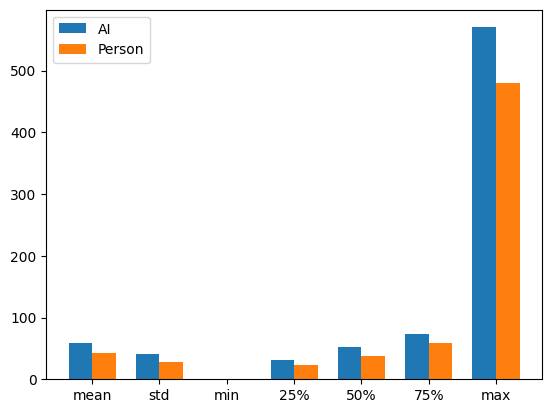

<Figure size 1000x600 with 0 Axes>

In [ ]:

index = np.arange(7)
bar_width = 0.35
fig, ax = plt.subplots()
plt.figure(figsize=(10,6))

AI = ax.bar(index, length_hypo.iloc[0], bar_width,
                label="AI")
Person  = ax.bar(index+bar_width, length_hypo.iloc[1], bar_width,
                label="Person")

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(length_hypo.columns.values.tolist())
ax.legend()
plt.show()

In [ ]:
train_data.head()

context  \
0  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∫–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞–µ—à—å —Å–æ–±–µ—Å–µ–¥–Ω...   
1  –∑–∞–º—É–∂–µ–º –∏—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –∑–∞–º–µ—á–∞—Ç...   
2  –∏–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ø–æ–Ω—è–ª –º–æ—Å–∫–≤–µ –ª—é–±...   
3  –æ—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏ –∫–∞—Ä–∏...   
4  —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è —Ñ–æ—Ç–≥—Ä–∞—Ñ...   

                                              answer  label  answer_length  
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...      0            331  
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...      1             80  
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.      0             25  
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.      0             44  
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.      0             44

In [ ]:
train_data.head()

context  \
0  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∫–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞–µ—à—å —Å–æ–±–µ—Å–µ–¥–Ω...   
1  –∑–∞–º—É–∂–µ–º –∏—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –∑–∞–º–µ—á–∞—Ç...   
2  –∏–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ø–æ–Ω—è–ª –º–æ—Å–∫–≤–µ –ª—é–±...   
3  –æ—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏ –∫–∞—Ä–∏...   
4  —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è —Ñ–æ—Ç–≥—Ä–∞—Ñ...   

                                              answer  label  answer_length  
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...      0            331  
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...      1             80  
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.      0             25  
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.      0             44  
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.      0             44

In [ ]:
from sklearn.model_selection import train_test_split
X = train_data.drop([
    # 'answer_length',
    # 'clean_answer_length',
    # 'context',
    'label'
    ], axis=1)
y = train_data['label']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
X.head()

context  \
0  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∫–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞–µ—à—å —Å–æ–±–µ—Å–µ–¥–Ω...   
1  –∑–∞–º—É–∂–µ–º –∏—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –∑–∞–º–µ—á–∞—Ç...   
2  –∏–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ø–æ–Ω—è–ª –º–æ—Å–∫–≤–µ –ª—é–±...   
3  –æ—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏ –∫–∞—Ä–∏...   
4  —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è —Ñ–æ—Ç–≥—Ä–∞—Ñ...   

                                              answer  answer_length  
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...            331  
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...             80  
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.             25  
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.             44  
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.             44

# Model

## CatBoost (–ü–µ—Ä–≤–∞—è –≤–µ—Ä—Å–∏—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞)

In [ ]:
catboost_scores = {
    'contex + answer + len': None,
    'contex + answer': None,
    'only answer': None,
}

In [ ]:
list(Xtrain)

['context', 'answer', 'answer_length']

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
text_features = ['context','answer']


train_pool = Pool(
    Xtrain,
    ytrain,
    text_features=text_features,
    feature_names=list(Xtrain)
)
valid_pool = Pool(
    Xtest,
    ytest,
    text_features=text_features,
    feature_names=list(Xtrain)
)

catboost_params = {
    'iterations': 10000,
    'learning_rate': 0.001,
    'eval_metric': 'F1',
    'task_type': 'CPU',
    'early_stopping_rounds': 300,
    'use_best_model': True,
    'verbose': 100
}

model = CatBoostClassifier(**catboost_params)
model.fit(train_pool, eval_set=valid_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7951500	test: 0.8274854	best: 0.8274854 (0)	total: 297ms	remaining: 49m 28s
100:	learn: 0.8014052	test: 0.8265647	best: 0.8276850 (62)	total: 44.6s	remaining: 1h 12m 52s
200:	learn: 0.8024870	test: 0.8252753	best: 0.8276850 (62)	total: 1m 18s	remaining: 1h 4m 7s
300:	learn: 0.8019925	test: 0.8260661	best: 0.8276850 (62)	total: 1m 56s	remaining: 1h 2m 28s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.8276849642
bestIteration = 62

Shrink model to first 63 iterations.


In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
catboost_scores = {
    'contex + answer + len': 0.83800,
    'contex + answer': 0.80800,
    'only answer': 0.82500,
}

In [ ]:
for key in catboost_scores.keys():
  print(key, catboost_scores[key])

contex + answer + len 0.838
contex + answer 0.808
only answer 0.825


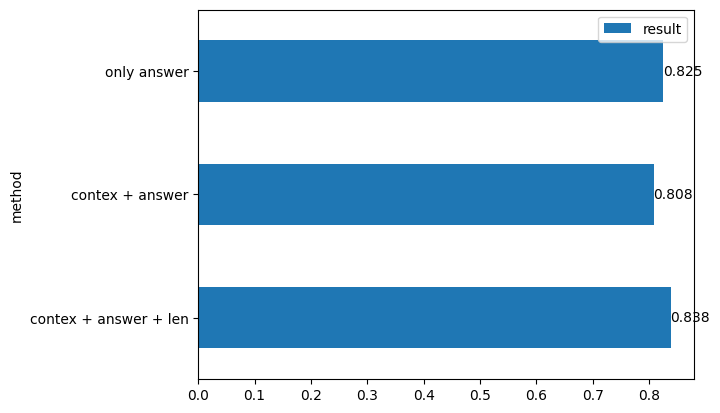

In [ ]:
metrics=pd.DataFrame({'method': [key for key in catboost_scores.keys()], 'result': [catboost_scores[key] for key in catboost_scores.keys()]})

ax = metrics.plot.barh(x='method', y='result', ylim=(0.5,1))

for container in ax.containers:
    ax.bar_label(container)

## Transformers

In [ ]:
!pip install simpletransformers -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 250.7/250.7 kB 6.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.1/7.1 MB 81.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 474.6/474.6 kB 43.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 107.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 92.4 MB/s eta 0:00:00
     

## Conversational.(–ù–µ —Ä–∞–±–æ—á–∏–π –≤–∞—Ä–∏–∞–Ω—Ç)
–ë—ã–ª–∞ –∏–¥–µ—è —Ä–∞–∑–±–∏—Ç—å –¥–∞–Ω–Ω—ã–µ–∫ –¥–ª—è –¥–æ–æ–±—É—á–µ–Ω–∏—è gpt –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –æ—Ç–≤–µ—Ç –¥–ª—è –æ—Ç–≤–µ—Ç–æ–≤ —Å –º–µ—Ç–∫–æ–π ai. –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å —É–∂–µ –≥–æ—Ç–æ–≤—ã–º —Å—Ç–æ–ª–±—Ü–æ–º answer. –ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –∏–∑-–∑–∞ –Ω–µ—Ö–≤–∞—Ç–∫–∏ –∑–Ω–∞–Ω–∏–π –∏ –≤—Ä–µ–º–µ–Ω–∏.

In [ ]:
me_context = []
ai_context = []
questions = []

for index, row in train_data.iterrows():
  sentence = row['context']
  me = sentence[:sentence.index('**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**')]
  ai = sentence[sentence.index('**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**'):sentence[1:].index('**–í—ã:**')+1]
  q = sentence[sentence[1:].index('**–í—ã:**'):]

  me_context.append(me)
  ai_context.append(ai)
  questions.append(q)


In [ ]:
train_data['me_context'] = me_context
train_data['ai_context'] = ai_context
train_data['question'] = questions
train_data.head()

context  \
0  **–í—ã:** –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ)).\n–ö–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞...   
1  **–í—ã:** –Ø —Ç–æ–∂–µ –Ω–µ –∑–∞–º—É–∂–µ–º. –ò—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞. ...   
2  **–í—ã:** –ò–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**...   
3  **–í—ã:** –û—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å –∏—Ö.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**...   
4  **–í—ã:** –í —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** ...   

                                              answer  label  answer_length  \
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...      0            331   
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...      1             80   
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.      0             25   
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.      0             44   
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.      0             44   

                                                text  \
0  **–í—ã:** –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ)).\n–ö–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞...   
1  **–í—ã:** –Ø —Ç–æ–∂–µ –Ω–µ –∑–∞–º—É–∂–µ–º. –ò—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞. ...   
2  **–í—ã:** –ò–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**...   
3  **–í—ã:** –û—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å –∏—Ö.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:**...   
4  **–í—ã:** –í —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è.\n\n**–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** ...   

                                          clean_text  \
0  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∫–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞–µ—à—å —Å–æ–±–µ—Å–µ–¥–Ω...   
1  –∑–∞–º—É–∂–µ–º –∏—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –∑–∞–º–µ—á–∞—Ç...   
2  –∏–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ø–æ–Ω—è–ª –º–æ—Å–∫–≤–µ –ª—é–±...   
3  –æ—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏ –∫–∞—Ä–∏...   
4  —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è —Ñ–æ—Ç–≥—Ä–∞—Ñ...   

                                          me_context  \
0  **–í—ã:** –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ)).\n–ö–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞...   
1  **–í—ã:** –Ø —Ç–æ–∂–µ –Ω–µ –∑–∞–º—É–∂–µ–º. –ò—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞. ...   
2                    **–í—ã:** –ò–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å.\n\n   
3                    **–í—ã:** –û—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å –∏—Ö.\n\n   
4                     **–í—ã:** –í —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è.\n\n   

                                          ai_context  \
0  **–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** —Ä—É—Å—Å–∫–∏–π —Ä—ç–ø –≤ –æ—Å–Ω–æ–≤–Ω–æ–º.\n–Ω—É —Ç–∞...   
1  **–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** –£ –º–µ–Ω—è –¥–æ–º–∞ –∂–∏–≤—É—Ç —Ç–æ–ª—å–∫–æ —Ä—ã–±–∫–∏...   
2          **–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** –ü–æ–Ω—è–ª.\n–ê —è –≤ –ú–æ—Å–∫–≤–µ.\n\n   
3         **–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** –ò —Ç–æ–∂–µ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏.\n\n   
4            **–°–æ–±–µ—Å–µ–¥–Ω–∏–∫:** –ß–µ–º —Ç—ã —É–≤–ª–µ–∫–∞–µ—à—å—Å—è?\n\n   

                                            question  
0                                \n**–í—ã:** –≠–º..–Ω–µ—Çüò±.  
1  \n**–í—ã:** –†—ã–±–∫–∏ —Ç–∏—Ö–∏–µ –∏ –Ω–µ –ø—Ä–∏—á–∏–Ω—è—Ç –¥–∏—Å–∫–æ–º—Ñ–æ—Ä—Ç...  
2            \n**–í—ã:** –ù–µ –ª—é–±–ª—é —à—É–º –±–æ–ª—å—à–∏—Ö –≥–æ—Ä–æ–¥–æ–≤.  
3  \n**–í—ã:** –ö–∞—Ä–∏—Ö —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ. –ó–µ–ª–µ–Ω—ã–µ –∫—Ä—É—Ç–æ.\...  
4    \n**–í—ã:** –¢—ã —Ñ–æ—Ç–≥—Ä–∞—Ñ.\n?\n–õ—é–±–ª—é –ø—É—Ç–µ—à–µ—Å—Ç–≤–æ–≤–∞—Ç—å?

## CLF

In [ ]:
train_data.head()

context  \
0  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∫–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞–µ—à—å —Å–æ–±–µ—Å–µ–¥–Ω...   
1  –∑–∞–º—É–∂–µ–º –∏—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –∑–∞–º–µ—á–∞—Ç...   
2  –∏–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ø–æ–Ω—è–ª –º–æ—Å–∫–≤–µ –ª—é–±...   
3  –æ—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏ –∫–∞—Ä–∏...   
4  —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è —Ñ–æ—Ç–≥—Ä–∞—Ñ...   

                                              answer  label  answer_length  \
0  –û–π, –Ω—É —Ç–æ–≥–¥–∞ –¥–∞–≤–∞–π —è —Ç–µ–±–µ –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥—É—é —á—Ç–æ-–Ω–∏–±...      0            331   
1  –ú–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–∏—Ö–∏–µ, –Ω–æ —Å–æ–≤—Å–µ–º –Ω–µ –º–∏—Ä–Ω—ã–µ, –º–æ–≥—É—Ç...      1             80   
2                          –í –¥–µ—Ä–µ–≤–Ω–µ —É –º–µ–Ω—è –Ω–∞ –¥–∞—á–µ.      0             25   
3       –í –¥–æ–º–µ - –ø–æ–ª–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –≤—Å–µ –Ω–∞ —Å–≤–æ–µ–º –º–µ—Å—Ç–µ.      0             44   
4       –î–∞, —è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—Ä—É—é, —ç—Ç–æ –º–æ—è —Å—Ç—Ä–∞—Å—Ç—å –∏ —Ö–æ–±–±–∏.      0             44   

   clean_answer_length  
0                  331  
1                   80  
2                   25  
3                   44  
4                   44

In [ ]:
train_transformers = train_data.drop(['answer_length', 'clean_answer_length'], axis=1)

train_transformers['context'] = train_transformers['context'] + train_transformers['answer']
train_transformers = train_transformers.drop(['answer', ], axis=1)
train_transformers.columns = ['text', 'label']
train_transformers.head()

text  label
0  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∫–∞–∫—É—é –º—É–∑—ã–∫—É —Å–ª—É—à–∞–µ—à—å —Å–æ–±–µ—Å–µ–¥–Ω...      0
1  –∑–∞–º—É–∂–µ–º –∏—â—É —Å–≤–æ–µ–≥–æ –ø—Ä–∏–Ω—Ü–∞ –ø–æ–∫–∞ —Ç–æ–ª—å–∫–æ—É –∑–∞–º–µ—á–∞—Ç...      1
2  –∏–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ø–æ–Ω—è–ª –º–æ—Å–∫–≤–µ –ª—é–±...      0
3  –æ—Å–æ–±–µ–Ω–Ω–æ —á–∏–Ω–∏—Ç—å —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ –ª—é–±–ª—é —Å—Ç–∏—Ä–∞–ª–∫–∏ –∫–∞—Ä–∏...      0
4  —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è —Å–æ–±–µ—Å–µ–¥–Ω–∏–∫ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è —Ñ–æ—Ç–≥—Ä–∞—Ñ...      0

In [ ]:
from sklearn.model_selection import train_test_split
train, eval = train_test_split(train_transformers, test_size=0.15, random_state=42)


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.metrics import f1_score

model_args = ClassificationArgs(
                                num_train_epochs=2,
                                use_early_stopping = True,
                                overwrite_output_dir=True,
                                train_batch_size=8,
                                eval_batch_size=8
                                )

pretrained_models = [
                      ["bert", "amberoad/bert-multilingual-passage-reranking-msmarco"],
                      ["bert", "bert-base-multilingual-cased"],
                      ["xlmroberta", "xlm-roberta-large"],
                      ["xlmroberta", "papluca/xlm-roberta-base-language-detection"]
                    ]

choice = 2

model = ClassificationModel(
    pretrained_models[choice][0], pretrained_models[choice][1], args=model_args
)



Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.den

In [ ]:
# Train the model
model.train_model(train, f1=f1_score)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval, f1=f1_score)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/654 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/654 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/923 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/116 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.0,
 'tp': 473,
 'tn': 0,
 'fp': 450,
 'fn': 0,
 'auroc': 0.5143199436222692,
 'auprc': 0.5218267519661964,
 'f1': 0.6776504297994269,
 'eval_loss': 0.6925932785560345}

In [ ]:
f1_scores= [0.819,
  0.842,
  0.678,
  0.837]

metrics = pd.DataFrame({'models': [pretrained_models[i][1] for i in range(4)], 'result':[f1_scores[i] for i in range(4)]})


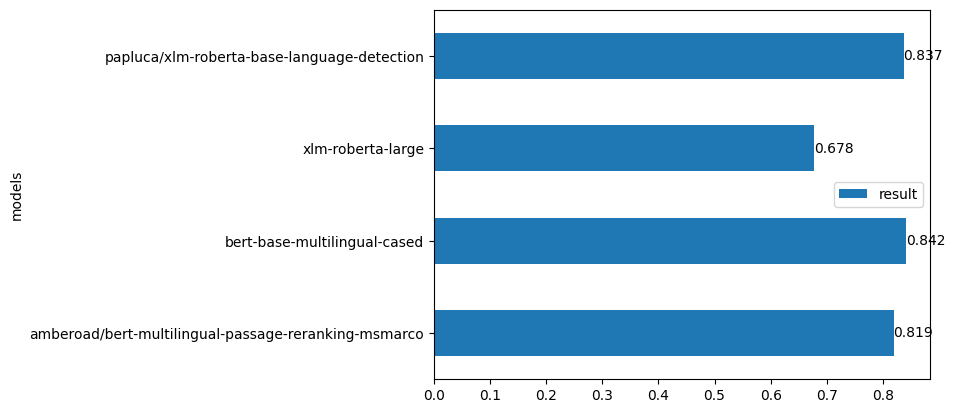

In [ ]:
ax = metrics.plot.barh(x='models', y='result', ylim=(0.5,1))

for container in ax.containers:
    ax.bar_label(container)

# inference

In [ ]:
test_data = pd.read_csv('private_test.csv')
test_data.head()

context  \
0  **–í—ã:** –°–ø–∞—Å–∏–±–æ –±—Ä–∞—Ç–∞–Ω,—Ç–µ–±—è —Ç–æ–∂–µ!!!\n\n**–°–æ–±–µ—Å...   
1  **–í—ã:** –ö–µ–º —Ä–∞–±–æ—Ç–∞–µ—à—å??\n–Ø —Ä–∞–±–æ—Ç–∞—é –∫–æ—Å–º–µ—Ç–æ–ª–æ–≥–æ...   
2  **–í—ã:** –ß—Ç–æ —á–∏—Ç–∞–ª–∏ –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ?\n\n**–°–æ–±–µ—Å–µ–¥...   
3  **–í—ã:** –Ø –º—ë–¥—Å–∏—Å—Ç—Ä–∞, –ª—é–±–ª—é –ø—É—Ç–µ—à–µ—Å—Ç–≤–æ–≤–∞—Ç—å —É–≤–ª–µ...   
4  **–í—ã:** –ê —Ç—ã —á–µ–º-—Ç–æ —É–≤–ª–µ–∫–∞–µ—à—å—Å—è –∫—Ä–æ–º–µ —Å–ø–æ—Ä—Ç–∞.\...   

                                              answer  
0  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä - –∫—Ä–∞—Å–∏–≤—ã–π –≥–æ—Ä–æ–¥. –ß—Ç–æ —Ç–µ–±–µ —Ç–∞–º –±–æ–ª—å—à...  
1  –ù–æ –Ω–µ –∑–Ω–∞—é, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–æ —É—Ö–∞–∂–∏–≤–∞—Ç—å –∑–∞ –Ω–∏–º–∏. –Ø...  
2                                          –≠—Ç–æ –∂–∏–∑–Ω—å  
3     –ñ–∏–≤—É –≤ –≥–æ—Ä–æ–¥–µ, –Ω–æ –º–µ—á—Ç–∞—é–æ –ø—Ä–∏—Ä–æ–¥–µ –∏ —Å–≤–æ–µ–º –¥–æ–º–µ  
4                           –ù–∞—á–∞—Ç—å –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –ø–æ–∑–¥–Ω–æ

In [ ]:
test_list = []

for index, row in test_data.iterrows():
  test_list.append(row['answer'])

In [ ]:
predictions, raw_outputs = model.predict(test_list)

  0%|          | 0/2482 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

In [ ]:
# –î–ª—è catboost

#test_data['text'] = test_data['context'] + test_data['answer']
#test_data['clean_text'] = test_data['text'].apply(clean_text)

# predictions = model.predict(test_data.drop(['context', 'answer', 'text'], axis=1))

In [ ]:
sub_df = pd.DataFrame(predictions, columns=['label_num'])

In [ ]:
sub_df['label'] = sub_df['label_num'].apply(lambda x: 'people' if x == 1 else 'ai')

In [ ]:
sub_df.drop(['label_num'], axis=1).to_csv('rucode_submission.csv', index = False)